# ARIMA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
from statsmodels.tsa.stattools import adfuller
import statsmodels.tsa.api as smt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_predict

## Подготовка данных

In [3]:
df = pd.read_csv(r"D:\TSML\1._Лекция_tsml\monthly-sales-of-company-x-jan-6.csv")
df.head()

,Month,Count
0,1965-01,154
1,1965-02,96
2,1965-03,73
3,1965-04,49
4,1965-05,36


Разобъем данные на тренировочную и тестовую выборки

In [4]:
slice_size = round(0.8 * len(df))
train = df.iloc[:slice_size, :]
test = df.iloc[slice_size:, :]

## Создание модели

In [5]:
best_aic = np.inf 
best_order = None
best_mdl = None

for i in range(5):
    for d in range(5):
        for j in range(5):
            try:
                tmp_mdl = smt.ARIMA(train.iloc[:, 1], order=(i,d,j), trend='ct').fit(method='innovations_mle')
                tmp_aic = tmp_mdl.aic
                if tmp_aic < best_aic:
                    best_aic = tmp_aic
                    best_order = (i, d, j)
                    best_mdl = tmp_mdl
            except: continue


print('aic: {:6.5f} | order: {}'.format(best_aic, best_order))

aic: 674.56402 | order: (4, 0, 2)


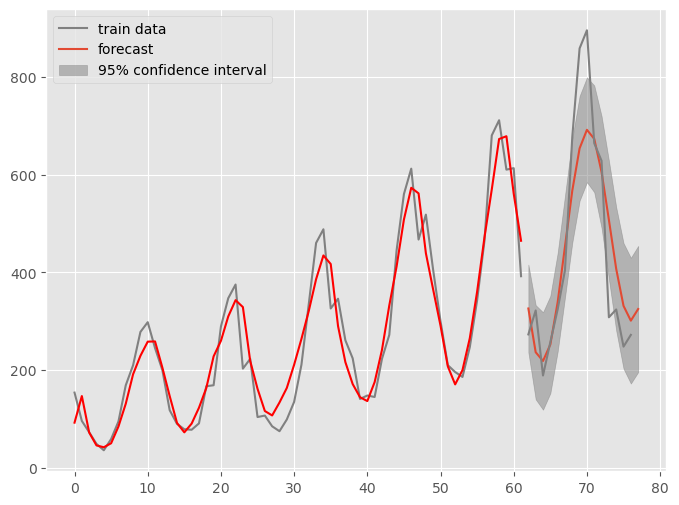

In [6]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(train.iloc[:, 1], 'gray', label='train data')
plot_predict(best_mdl, start=62, end=77, ax=ax)
ax.plot(best_mdl.predict(), 'red')
ax.plot(range(62, 77), test.iloc[:, 1], 'gray', label='test data')

plt.show()

Видим, что тестовые данные не вписались в 95-процентный интервал.

0.6210101574103899


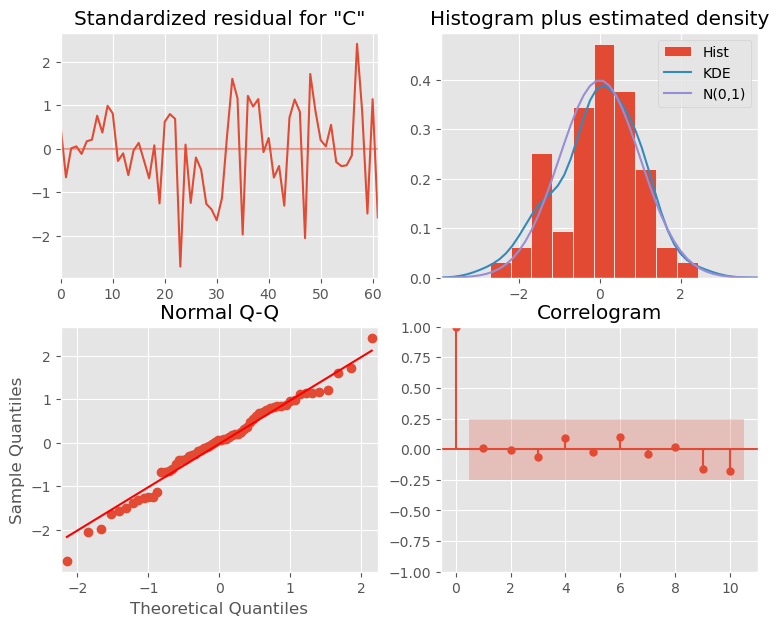

In [21]:
# Посмотрим на график остатков

print(adfuller(best_mdl.resid)[1])
best_mdl.plot_diagnostics(figsize=(9, 7))

plt.show()